In [1]:
import networkx as nx
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np
import warnings
from custom import load_data as cf

warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
# %load_ext autoreload
# %autoreload 2
# %config InlineBackend.figure_format = 'retina'  # enable 2x retina images 

In [3]:
G = cf.load_seventh_grader_network()

In [4]:
list(G.nodes(data=True))[0:5]

[(1, {'gender': 'male'}),
 (2, {'gender': 'male'}),
 (3, {'gender': 'male'}),
 (4, {'gender': 'male'}),
 (5, {'gender': 'male'})]

In [5]:
list(G.edges(data=True))[0:5]

[(1, 2, {'count': 1}),
 (1, 3, {'count': 1}),
 (1, 4, {'count': 2}),
 (1, 5, {'count': 2}),
 (1, 6, {'count': 3})]

In this artificial social network, the number of times the left student indicated that the right student was their favourite is stored in the "count" variable.

In [6]:
# G.node
# G.edges
print (len(G.node), len(G.edges))

29 376


In [7]:
from collections import Counter
mf_counts = Counter([d['gender'] for n, d in G.nodes(data=True)])
mf_counts

Counter({'male': 12, 'female': 17})

In [8]:
counts = [d['count'] for n1, n2, d in G.edges(data=True)]
maxcount = max(counts)
maxcount

3

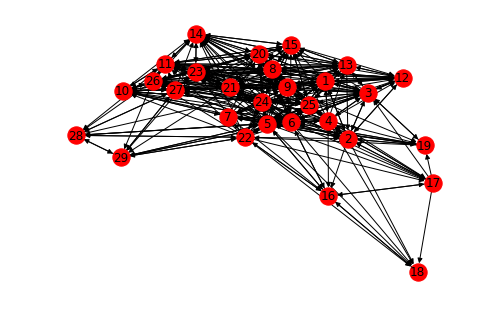

In [9]:
nx.draw(G, with_labels=True)

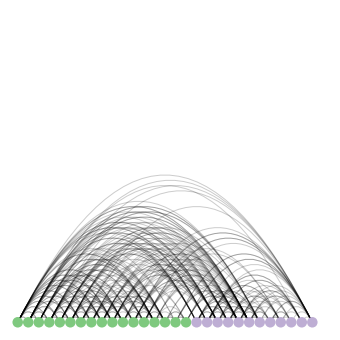

In [10]:
from nxviz import ArcPlot

a = ArcPlot(G, node_color='gender', node_grouping='gender')
a.draw()

In [11]:
G = cf.load_sociopatterns_network()

In [12]:
list(G.nodes(data=True))[0:5]

[(100, {'order': 100.0}),
 (101, {'order': 101.0}),
 (102, {'order': 102.0}),
 (103, {'order': 103.0}),
 (104, {'order': 104.0})]

In [13]:
list(G.edges(data=True))[0:5]

[(100, 101, {'weight': 2}),
 (100, 102, {'weight': 1}),
 (100, 103, {'weight': 4}),
 (100, 104, {'weight': 3}),
 (100, 105, {'weight': 10})]

In [14]:
list(G.neighbors(5))

[1, 3, 11, 12, 16, 19, 6, 7, 9]

In [15]:
hubs = {}
for node in G.node:
    hubs[node] = len(list(G.neighbors(node)))
# hubs

In [16]:
import pandas as pd
hubs1 = pd.DataFrame.from_dict(hubs, orient = 'index').reset_index()
hubs1.columns = ['Node','Neighbors']
hubs1.head()
hubs1.sort_values('Neighbors', ascending= False).head(10)

,Node,Neighbors
120,51,50
159,272,47
102,235,43
176,195,43
156,265,34
79,161,34
118,219,34
117,181,33
199,292,33
119,50,33


In [17]:
hubs1['Centrality'] = hubs1['Neighbors']/hubs1.shape[0]
hubs1.head()

,Node,Neighbors,Centrality
0,100,29,0.070732
1,101,13,0.031707
2,102,16,0.039024
3,103,26,0.063415
4,104,17,0.041463


In [18]:
list(nx.degree_centrality(G).items())[0:5]

[(100, 0.07090464547677261),
 (101, 0.03178484107579462),
 (102, 0.039119804400977995),
 (103, 0.06356968215158924),
 (104, 0.04156479217603912)]

### Shortest Path Algorithm - Breadth First Search

In [19]:
def pathExists(node1, node2, G):
    visited_nodes = set()
    queue = [node1]

    for node in queue:
        neighbors = list(G.neighbors(node))
#         print("Neighbors for Node",node,"are",neighbors)
        if node2 in neighbors:
            print('Path exists between nodes {0} and {1}'.format(node1, node2))
            return True
        else:
            visited_nodes.add(node)
            queue.extend([n for n in neighbors if n not in visited_nodes])
#             print(queue)
        
    print('Path does not exist between nodes {0} and {1}'.format(node1, node2))
    return False

In [20]:
pathExists(4, 400, G)

Path exists between nodes 4 and 400


True

In [21]:
nx.has_path(G, 400, 1)

True

In [22]:
nx.shortest_path(G, 4, 400)

[4, 90, 111, 112, 132, 230, 335, 400]

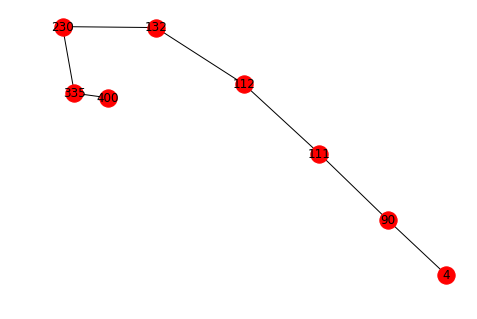

In [23]:
def graphShortestPath(node1, node2, G):
    if nx.has_path(G, node1, node2):
        nodes = nx.shortest_path(G, node1, node2)
        newG = G.subgraph(nodes)
        nx.draw(newG,with_labels=True)
        
    else:
        raise Exception('Path does not exist between nodes {0} and {1}.'.format(source, target))  
graphShortestPath(4,400,G)        

### Draw Neighbor Nodes 

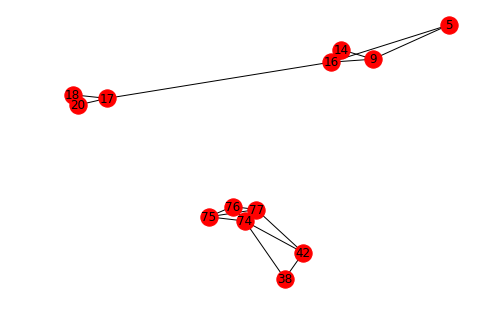

In [24]:
def draw_neighbor_edges1(G, node):
    neighbors = G.neighbors(node)
    newG = G.subgraph(neighbors)
    nx.draw(newG,with_labels=True)
draw_neighbor_edges1(G, 19)
# nx.draw(newG, with_labels=True)

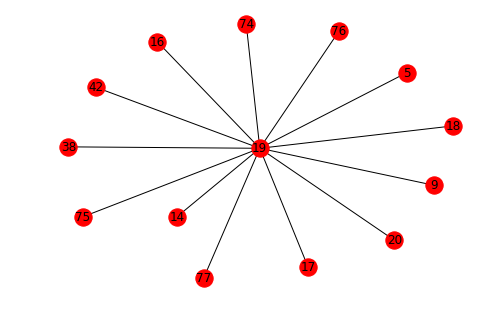

In [25]:
def extract_neighbor_edges2(G, node):
    neighbors = G.neighbors(node)
    newG = nx.Graph()
    
    for neighbor in neighbors:
        if (node, neighbor) in G.edges() or (neighbor, node) in G.edges():
            newG.add_edge(node, neighbor)

    return newG

fig = plt.figure(1)
newG = extract_neighbor_edges2(G, 19)
nx.draw(newG, with_labels=True)

In [26]:
list(G.neighbors(19))

[14, 16, 17, 18, 20, 38, 42, 74, 75, 76, 77, 5, 9]

# Cliques

In [27]:
G = cf.load_physicians_network()

In [28]:
list(nx.find_cliques(G))

[[1, 2],
 [1, 3],
 [1, 4, 5, 6],
 [1, 7],
 [1, 72],
 [2, 41],
 [2, 10],
 [2, 11, 40],
 [2, 11, 39],
 [2, 42, 110],
 [3, 67, 42],
 [3, 101],
 [3, 9, 41],
 [3, 9, 11],
 [3, 112],
 [3, 91],
 [4, 6, 32],
 [4, 6, 109],
 [4, 104],
 [4, 74, 116],
 [4, 46, 55],
 [4, 22],
 [4, 55, 32],
 [4, 59],
 [5, 38, 69],
 [5, 39],
 [5, 9, 66],
 [5, 9, 69],
 [5, 9, 8],
 [5, 9, 85],
 [5, 9, 89],
 [5, 45],
 [5, 91],
 [6, 31, 109],
 [7, 102],
 [8, 9, 10],
 [8, 9, 11],
 [8, 12, 11],
 [9, 70, 41],
 [9, 70, 10],
 [9, 40, 66],
 [9, 40, 11, 89],
 [9, 40, 85],
 [9, 40, 69],
 [9, 41, 69],
 [9, 10, 89],
 [9, 82, 85],
 [9, 53, 89],
 [10, 67, 89],
 [10, 102, 94],
 [10, 108],
 [10, 77, 89],
 [10, 77, 45],
 [10, 77, 38],
 [10, 83, 91],
 [10, 54],
 [10, 91, 94],
 [11, 65, 15],
 [11, 39, 12],
 [11, 40, 12, 15],
 [11, 40, 94],
 [11, 43, 15],
 [11, 79],
 [11, 87],
 [11, 28, 12],
 [11, 93],
 [12, 97, 19],
 [12, 97, 100],
 [12, 97, 47],
 [12, 67, 66],
 [12, 100, 28],
 [12, 40, 66],
 [12, 40, 75],
 [12, 40, 69, 73],
 [12, 108],


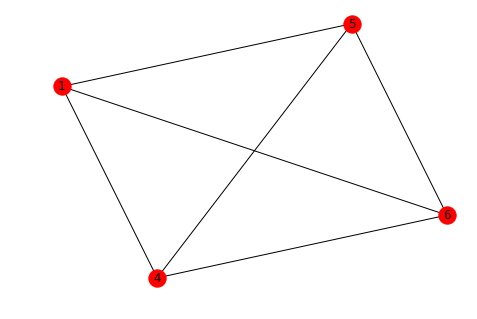

In [29]:
newG = G.subgraph(list(nx.find_cliques(G))[2])
nx.draw(newG, with_labels=True)

# Bike Stations 

In [30]:
stations = pd.read_csv('datasets/divvy_2013/Divvy_Stations_2013.csv', parse_dates=['online date'], encoding='utf-8')
stations.head()

,id,name,latitude,longitude,dpcapacity,landmark,online date
0,5,State St & Harrison St,41.873958,-87.627739,19,30,2013-06-28
1,13,Wilton Ave & Diversey Pkwy,41.932500,-87.652681,19,66,2013-06-28
2,14,Morgan St & 18th St,41.858086,-87.651073,15,163,2013-06-28
3,15,Racine Ave & 18th St,41.858181,-87.656487,15,164,2013-06-28
4,16,Wood St & North Ave,41.910329,-87.672516,15,223,2013-08-12


In [31]:
trips = pd.read_csv('datasets/divvy_2013/Divvy_Trips_2013.csv',parse_dates=['starttime', 'stoptime'])
trips.head(5)

,trip_id,starttime,stoptime,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthday
0,4118,2013-06-27 12:11:00,2013-06-27 12:16:00,480,316,85,Michigan Ave & Oak St,28,Larrabee St & Menomonee St,Customer,NaN,NaN
1,4275,2013-06-27 14:44:00,2013-06-27 14:45:00,77,64,32,Racine Ave & Congress Pkwy,32,Racine Ave & Congress Pkwy,Customer,NaN,NaN
2,4291,2013-06-27 14:58:00,2013-06-27 15:05:00,77,433,32,Racine Ave & Congress Pkwy,19,Loomis St & Taylor St,Customer,NaN,NaN
3,4316,2013-06-27 15:06:00,2013-06-27 15:09:00,77,123,19,Loomis St & Taylor St,19,Loomis St & Taylor St,Customer,NaN,NaN
4,4342,2013-06-27 15:13:00,2013-06-27 15:27:00,77,852,19,Loomis St & Taylor St,55,Halsted St & James M Rochford St,Customer,NaN,NaN


In [32]:
x = trips.groupby(['from_station_id', 'to_station_id']).agg('count').reset_index()
x = x[['from_station_id', 'to_station_id', 'trip_id']]
x.columns = ['FromStation', 'ToStation', 'NumberofTrips']
print(x.head())
numberOfTrips= x['NumberofTrips']

   FromStation  ToStation  NumberofTrips
0            5          5            232
1            5         13              1
2            5         14             15
3            5         15              9
4            5         16              4


### Now we will make the graph from the data that we have

In [33]:
# stations.to_dict('records')[0]
# trips.to_dict('records')[0]

In [34]:
G = nx.DiGraph()
for item in stations.to_dict('records'):
    node_id = item['id']
    G.add_node(node_id, name = item['name'], lat = item['latitude'], long = item['longitude'])

In [35]:
# list(G.nodes(data=True))[0:10]

In [36]:
for d in x.to_dict('records'):
    G.add_edge(d['FromStation'], d['ToStation'], count=d['NumberofTrips'])

In [37]:
# list(G.edges(data=True))[0:10]

In [38]:
# Filter the edges to just those with more than 100 trips.
G_filtered = G.copy()
for u, v, d in G.edges(data=True):
    if d['count'] < 100:
        G_filtered.remove_edge(u,v)
        
len(G_filtered.edges())

1324